# Task 3 - Experience Analytics

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel('cleaned_data.xlsx')
df

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0000,2019-04-25 14:35:31,662.00000,1.823652e+06,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,3.674974e+07,3.088796e+08
1,13114483482878900224,2019-04-09 13:04:04,235.0000,2019-04-25 08:15:48,606.00000,1.365104e+06,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,5.380039e+07,6.533850e+08
2,13114483484080500736,2019-04-09 17:42:11,1.0000,2019-04-25 11:58:13,652.00000,1.361762e+06,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,2.788364e+07,2.798073e+08
3,13114483485442799616,2019-04-10 00:31:25,486.0000,2019-04-25 07:36:35,171.00000,1.321509e+06,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,4.332422e+07,8.460285e+08
4,13114483499480700928,2019-04-12 20:10:23,565.0000,2019-04-25 10:40:32,954.00000,1.089009e+06,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,3.854281e+07,5.691386e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,2019-04-29 07:28:42,451.0000,2019-04-30 06:02:33,214.00000,8.123000e+04,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,5.762885e+07,5.741753e+08
149997,7349883264234609664,2019-04-29 07:28:42,483.0000,2019-04-30 10:41:33,187.00000,9.797000e+04,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,3.913508e+07,6.666488e+08
149998,13114483573367300096,2019-04-29 07:28:43,283.0000,2019-04-30 10:46:12,810.00000,9.824900e+04,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,3.491222e+07,5.927864e+08
149999,13114483573367300096,2019-04-29 07:28:43,696.0000,2019-04-30 10:40:34,327.00000,9.791000e+04,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,2.962610e+07,3.718959e+08


# Task 3. 1 - Aggregate, per customer, the following information (treat missing & outliers by replacing with the mean or the mode of the corresponding variable):


In [8]:
#Group 'MSISDN/Number' and caluclate the average TCP retransmission per customer

average_TCP_per_cust = df.groupby('MSISDN/Number')['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)'].mean().reset_index()

average_TCP_per_cust['Average TCP'] = average_TCP_per_cust[['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)']].mean(axis=1)

#Display the resulting Dataframe with MSISDN/Number and Average TCP column
print(average_TCP_per_cust[['MSISDN/Number', 'Average TCP']].head())

   MSISDN/Number   Average TCP
0   3.360100e+10  1.078479e+07
1   3.360100e+10  1.078479e+07
2   3.360100e+10  1.078479e+07
3   3.360101e+10  3.803623e+05
4   3.360101e+10  7.735101e+06


In [6]:
#Group 'MSISDN/Number' and caluclate the average RTT per customer

average_RTT_per_cust = df.groupby('MSISDN/Number')['Avg RTT DL (ms)', 'Avg RTT UL (ms)'].mean().reset_index()

average_RTT_per_cust['Average RTT'] = average_RTT_per_cust[['Avg RTT DL (ms)', 'Avg RTT UL (ms)']].mean(axis=1)

#Display the resulting Dataframe with MSISDN/Number and Average RTT column
print(average_RTT_per_cust[['MSISDN/Number', 'Average RTT']].head())

   MSISDN/Number  Average RTT
0   3.360100e+10    23.000000
1   3.360100e+10    15.500000
2   3.360100e+10    63.729294
3   3.360101e+10    42.000000
4   3.360101e+10    29.750000


In [9]:
#Group'MSISDN/Number' and caluclate the Handset Type per customer

# Aggregate handset types per customer
customer_handset_aggregated = df.groupby('MSISDN/Number')['Handset Type'].unique().reset_index(name='Handset Types')

# Display the result
print(customer_handset_aggregated)

        MSISDN/Number                                      Handset Types
0        3.360100e+10                   [Huawei P20 Lite Huawei Nova 3E]
1        3.360100e+10                           [Apple iPhone 7 (A1778)]
2        3.360100e+10                                        [undefined]
3        3.360101e+10                          [Apple iPhone 5S (A1457)]
4        3.360101e+10                          [Apple iPhone Se (A1723)]
...               ...                                                ...
106852   3.379000e+10                      [Apple iPhone 8 Plus (A1897)]
106853   4.188282e+10  [undefined, nan, Samsung Galaxy J5 (Sm-J530), ...
106854   3.197021e+12                 [Quectel Wireless. Quectel Ec25-E]
106855   3.370000e+14                                 [Huawei B525S-23A]
106856   8.823971e+14                 [Quectel Wireless. Quectel Ec21-E]

[106857 rows x 2 columns]


In [10]:
#Group 'MSISDN/Number' and caluclate the Avg Bearer TP DL (kbps) per customer

average_TP_per_cust = df.groupby('MSISDN/Number')['Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)'].mean().reset_index()

average_TP_per_cust['Average TP'] = average_TP_per_cust[['Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']].mean(axis=1)

#Display the resulting Dataframe with MSISDN/Number and Average TP column
print(average_TP_per_cust[['MSISDN/Number', 'Average TP']].head())



   MSISDN/Number  Average TP
0   3.360100e+10        38.0
1   3.360100e+10        49.5
2   3.360100e+10        48.5
3   3.360101e+10       124.0
4   3.360101e+10     14211.0


# Task 3.2 - Compute & list 10 of the top, bottom and most frequent:


a.TCP values in the dataset. 

In [37]:
#Display The top TCP values
Top_TCP_values =  (df['TCP DL Retrans. Vol (Bytes)']+df['TCP UL Retrans. Vol (Bytes)']).nlargest(10)

print('Top 10 TCP Values:')
print(Top_TCP_values)

#Diplay the Bottom TCP values
Bottom_TCP_values = (df['TCP DL Retrans. Vol (Bytes)']+df['TCP UL Retrans. Vol (Bytes)']).nsmallest(10)
print('\nBottom 10 TCP values:')
print(Bottom_TCP_values)

#Display the most frequent TCP values
Most_Frequent_TCP_values = (df['TCP DL Retrans. Vol (Bytes)']+df['TCP UL Retrans. Vol (Bytes)']).value_counts().head(10)

print('\n Most Frequent 10 TCP values:')
print(Most_Frequent_TCP_values)

Top 10 TCP Values:
34636     4.344116e+09
140797    4.301477e+09
77950     4.294432e+09
135677    4.291465e+09
3741      4.288121e+09
119667    4.275492e+09
39608     4.268647e+09
59011     4.261616e+09
76971     4.260174e+09
41182     4.254660e+09
dtype: float64

Bottom 10 TCP values:
143594     86.0
111100     97.0
18417     106.0
13142     108.0
97061     113.0
8794      128.0
99947     129.0
83214     134.0
95955     134.0
12849     143.0
dtype: float64

 Most Frequent 10 TCP values:
2.156957e+07    85265
2.081121e+07      650
7.609887e+05      249
2.081124e+07      248
7.596967e+05      136
7.597507e+05      132
2.081123e+07      132
7.623187e+05      121
7.609767e+05      106
2.081257e+07       99
dtype: int64


b.RTT values in the dataset.

In [38]:
#Display The top RTT values
Top_RTT_values =  (df['Avg RTT DL (ms)']+df['Avg RTT UL (ms)']).nlargest(10)

print('Top 10 RTT Values:')
print(Top_RTT_values)

#Diplay the Bottom TCP values
Bottom_RTT_values = (df['Avg RTT DL (ms)']+df['Avg RTT UL (ms)']).nsmallest(10)
print('\nBottom 10 RTT values:')
print(Bottom_RTT_values)

#Display the most frequent TCP values
Most_Frequent_RTT_values = (df['Avg RTT DL (ms)']+df['Avg RTT UL (ms)']).value_counts().head(10)

print('\n Most Frequent 10 RTT values:')
print(Most_Frequent_RTT_values)

Top 10 RTT Values:
30155     96924.0
29916     64641.0
17894     55812.0
5963      54848.0
22839     27278.0
23442     26300.0
1361      25922.0
81256     25715.0
97312     25388.0
100575    24738.0
dtype: float64

Bottom 10 RTT values:
42602     0.0
103321    0.0
124538    0.0
143878    0.0
71738     2.0
50966     4.0
144923    4.0
103544    5.0
8756      6.0
123210    6.0
dtype: float64

 Most Frequent 10 RTT values:
127.458589    27801
29.000000      4993
39.000000      4222
38.000000      2761
40.000000      2647
30.000000      2592
28.000000      2424
49.000000      2219
41.000000      1978
31.000000      1960
dtype: int64


c.Throughput values in the dataset.

In [40]:
#Display The top TP values
Top_TP_values =  (df['DL TP > 1 Mbps (%)']+df['UL TP < 10 Kbps (%)']).nlargest(10)
print('Top 10 TP Values:')
print(Top_TP_values)

#Diplay the Bottom TP values
Bottom_TP_values = (df['DL TP > 1 Mbps (%)']+df['UL TP < 10 Kbps (%)']).nsmallest(10)
print('\nBottom 10 TP values:')
print(Bottom_TP_values)

#Display the most frequent TP values
Most_Frequent_TP_values = (df['DL TP > 1 Mbps (%)']+df['UL TP < 10 Kbps (%)']).value_counts().head(10)

print('\n Most Frequent 10 TP values:')
print(Most_Frequent_TP_values)

Top 10 TP Values:
2433      192.0
40819     181.0
38561     178.0
13740     173.0
96313     173.0
115952    171.0
120672    169.0
24683     168.0
12349     165.0
80334     164.0
dtype: float64

Bottom 10 TP values:
2104      0.0
113929    0.0
34828     2.0
35796     2.0
67334     2.0
80270     3.0
134718    3.0
58944     4.0
978       6.0
68575     7.0
dtype: float64

 Most Frequent 10 TP values:
100.0    96592
99.0     17387
98.0      5970
101.0     4162
102.0     2826
97.0      2557
103.0     2068
104.0     1573
96.0      1439
105.0     1217
dtype: int64


# Task 3.3 - Compute & report:

d. The distribution of the average throughput per handset type and provide interpretation for your findings.

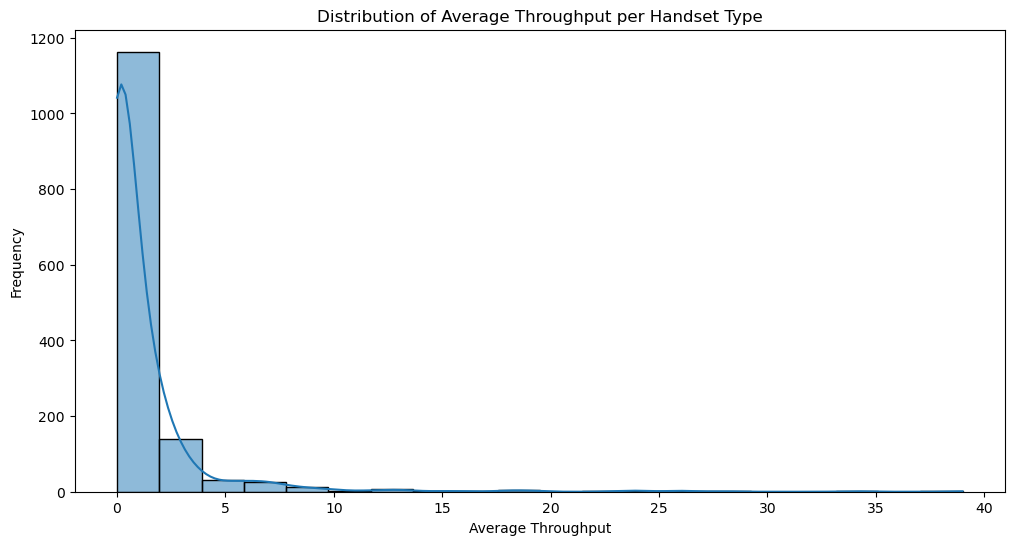

In [29]:
# Calculate the average throughput per handset type
average_throughput_per_handset = df.groupby('Handset Type')['DL TP > 1 Mbps (%)'].mean().reset_index()

# Plot the distribution
plt.figure(figsize=(12, 6))
sns.histplot(average_throughput_per_handset['DL TP > 1 Mbps (%)'], kde=True, bins=20)
plt.title('Distribution of Average Throughput per Handset Type')
plt.xlabel('Average Throughput')
plt.ylabel('Frequency')
plt.show()

e. The average TCP retransmission view per handset type and provide interpretation for your findings.

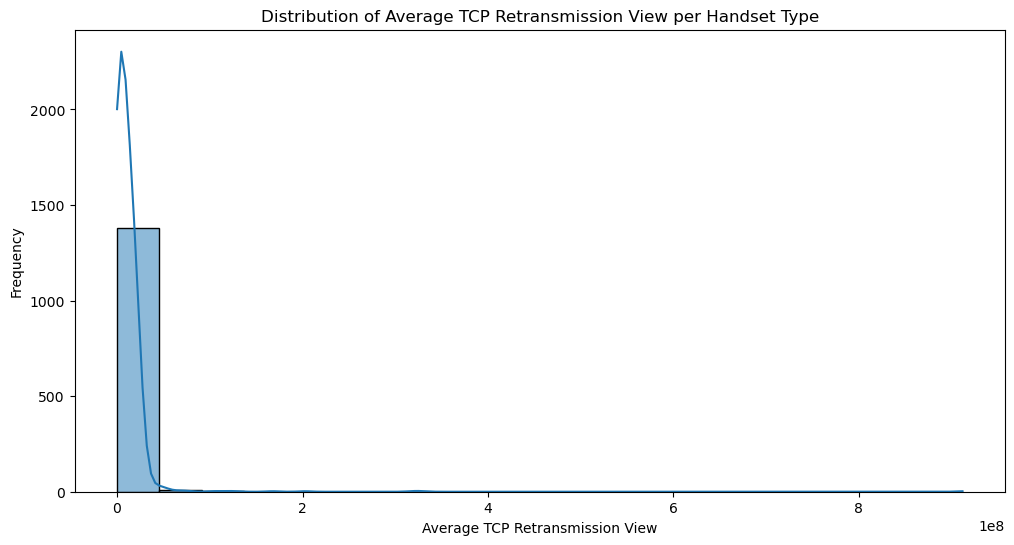

In [42]:
# Calculate the average TCP retransmission view per handset type
average_tcp_retransmission_per_handset = df.groupby('Handset Type')['TCP DL Retrans. Vol (Bytes)'].mean().reset_index()

# Plot the distribution
plt.figure(figsize=(12, 6))
sns.histplot(average_tcp_retransmission_per_handset['TCP DL Retrans. Vol (Bytes)'], kde=True, bins=20)
plt.title('Distribution of Average TCP Retransmission View per Handset Type')
plt.xlabel('Average TCP Retransmission View')
plt.ylabel('Frequency')
plt.show()

**3.4 Using the experience metrics above, perform a k-means clustering (where k = 3) to segment users into groups of experiences and provide a brief description of each cluster. (The description must define each group based on your understanding of the data)**


In [43]:
experiance_Metrics = df.groupby('MSISDN/Number').agg({'average_TCP_per_cust': 'sum', 'average_RTT_per_cust': 'sum', 'average_TP_per_cust': 'sum'})

b

KeyError: "Column(s) ['average_RTT_per_cust', 'average_TCP_per_cust', 'average_TP_per_cust'] do not exist"

In [35]:
selected_columns = ['average_TCP_per_cust', 'average_RTT_per_cust', 'average_TP_per_cust']

# Normalize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(experience_metrics[selected_columns])

# Perform k-means clustering (k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
experience_metrics['Cluster'] = kmeans.fit_predict(normalized_data)

# Display cluster characteristics
cluster_description = experience_metrics.groupby('Cluster')[selected_columns].mean()
print(cluster_description)

NameError: name 'experience_metrics' is not defined